In [17]:
import sys
  
# setting path
sys.path.append('../src')

from AnalysisTools import *

In [25]:
data86 = read_decoy_dir("../data/SBit86/", ".sc")
data86['peptide'] = '86'
add_labels(data86)
data86 = get_top(data86, 'mutcode', 'I_sc', 1)
data104 = read_decoy_dir("../data/SBit104/", ".sc")
data104['peptide'] = '104'
add_labels(data104)
data104 = get_top(data104, 'mutcode', 'I_sc', 1)

data = pd.concat([data86, data104])

data.sample(5)

,decoy,I_bsa,I_hb,I_pack,I_sc,I_unsat,dslf_fa13,fa_atr,fa_dun,fa_elec,...,startRMSbb,startRMSca,total_score,yhh_planarity,filename,peptide,position,mutcode,AA,aa class
0,A149_CYSSBit86_0001_0001,2058.999023,21,0.022334,-102.315063,0,0,-926.110556,206.866505,-301.778876,...,0,0,-473.949439,0.387468,A149_CYSSBit86_0001.pdb_dock.sc,86,149,149CYS,CYS,polar
0,A144_ASPSBit104_0001_0001,2068.827148,19,-0.025327,-92.393127,0,0,-912.535673,213.073026,-307.085735,...,0,0,-476.876254,0.156093,A144_ASPSBit104_0001.pdb_dock.sc,104,144,144ASP,ASP,acidic
0,A154_ILESBit86_0001_0001,2089.468750,22,-0.018285,-105.693695,0,0,-932.831333,205.488946,-305.417338,...,0,0,-484.000077,0.193642,A154_ILESBit86_0001.pdb_dock.sc,86,154,154ILE,ILE,nonpolar
0,A142_SERSBit86_0001_0001,2122.218750,21,-0.000842,-99.203278,0,0,-918.306532,202.653731,-305.501772,...,0,0,-493.024654,0.304974,A142_SERSBit86_0001.pdb_dock.sc,86,142,142SER,SER,polar
0,A139_LYSSBit104_0001_0001,2099.512695,18,-0.053768,-90.870270,0,0,-918.254965,206.215180,-305.201361,...,0,0,-481.938851,0.162195,A139_LYSSBit104_0001.pdb_dock.sc,104,139,139LYS,LYS,basic


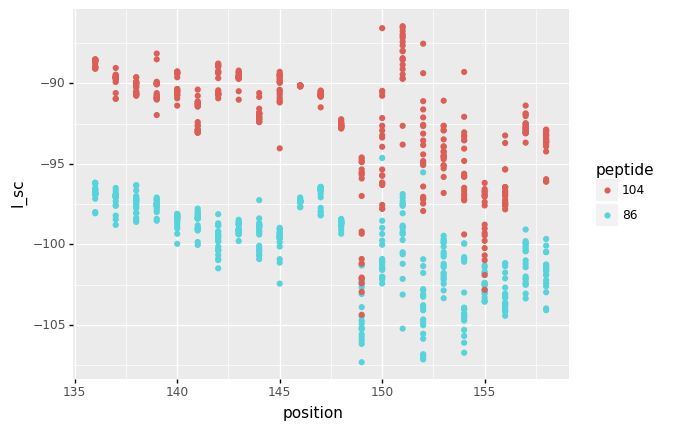

<ggplot: (8786022305088)>

In [26]:
(
    pn.ggplot(data, pn.aes('position', 'I_sc', color='peptide'))
    + pn.geom_point()
)

In [27]:
from itertools import combinations

mutations = list(set(data['mutcode']))
mut_pairs = combinations(mutations,2)

data104i = data104.set_index('mutcode')
data86i = data86.set_index('mutcode')

In [41]:
p104vs86 = data104i['I_sc'] / data86i['I_sc']
p86vs104 = data86i['I_sc'] / data104i['I_sc']

preferences = pd.DataFrame(p104vs86).rename(columns={'I_sc':'104/86'})
preferences['86/104'] = p86vs104

print("Preferred 86 position: ",preferences.iloc[np.argmax(preferences['86/104'])])
print("Preferred 104 position: ",preferences.iloc[np.argmax(preferences['104/86'])])

Preferred 86 position:  104/86    0.859887
86/104    1.162943
Name: 152ASN, dtype: float64
Preferred 104 position:  104/86    1.010217
86/104    0.989886
Name: 155ARG, dtype: float64


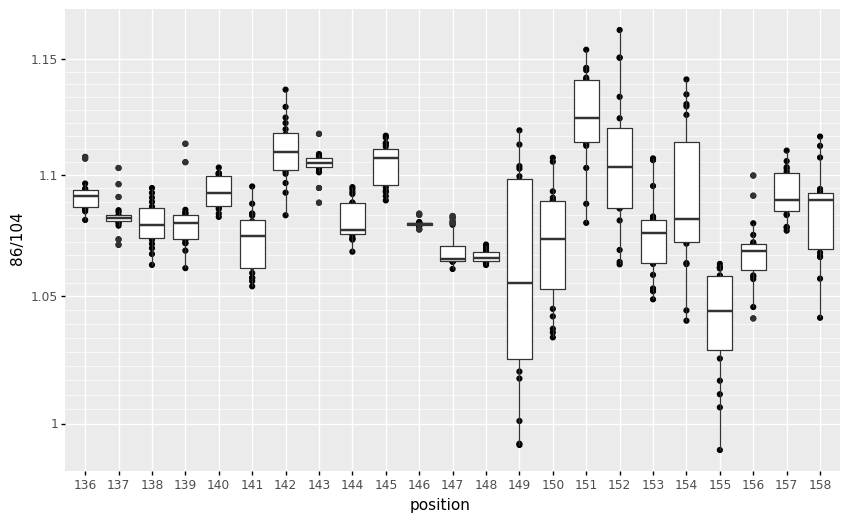

<ggplot: (8786070053801)>

In [54]:
preferences['position'] = [x[:-3] for x in preferences.index]

pn.options.figure_size = (10, 6)
(
    pn.ggplot(preferences, pn.aes('position', '86/104', logy=True))
    + pn.geom_point()
    + pn.geom_boxplot()
    + pn.scale_y_log10()
)

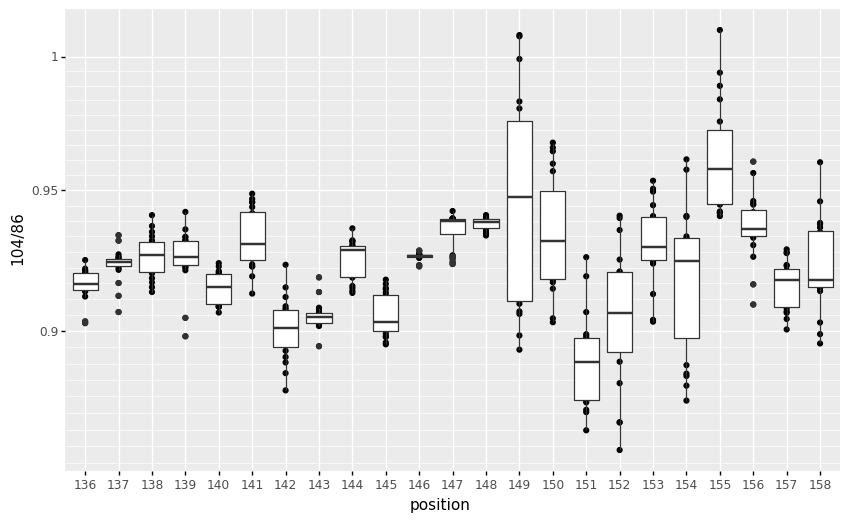

<ggplot: (8786069772451)>

In [55]:
(
    pn.ggplot(preferences, pn.aes('position', '104/86'))
    + pn.geom_point()
    + pn.geom_boxplot()
    + pn.scale_y_log10()
)